In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data = pd.read_csv('/Users/rashidat/Documents/GitHub/data-analysis/test.csv')
test_data = pd.read_csv('/Users/rashidat/Documents/GitHub/data-analysis/test.csv')

In [6]:
train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,1713.7692,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,3361.6242,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,3124.5994,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,1603.9122,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,1300.3074,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


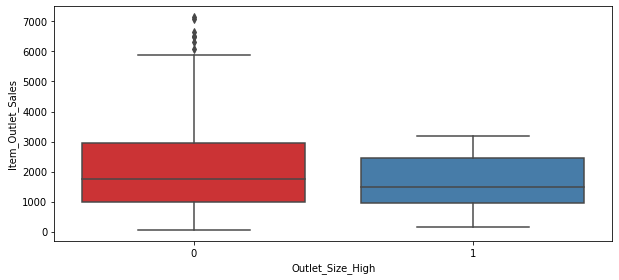

In [30]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size_High', y='Item_Outlet_Sales', data=train_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [34]:
# Now, we need to predict the missing target variable in the test data
# target variable - Item_Outlet_Sales

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Item_Outlet_Sales'],axis=1)
train_y = train_data['Item_Outlet_Sales']


/Users/temitope/opt/anaconda3/envs/carprediction/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

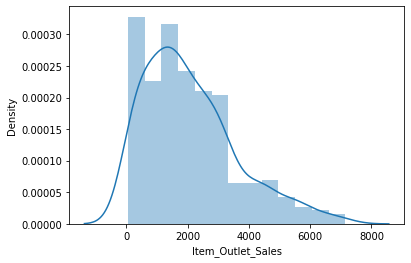

In [35]:
sns.distplot(train_data['Item_Outlet_Sales'])

In [18]:
# seperate the independent and target variable on training data
test_x = test_data.drop(columns=['Item_Outlet_Sales'],axis=1)
test_y = test_data['Item_Outlet_Sales']

In [19]:
model = LinearRegression()

# fit the model with the training data
model.fit(train_x,train_y)

LinearRegression()

In [20]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)


Coefficient of model : [-9.43246817e+00 -1.36334814e+03  1.47120996e+01  5.25716701e+00
 -3.08160713e+02  5.40196700e+01  1.46460862e+02 -1.86881844e+02
  2.94562026e+02 -1.20978659e+02  1.91147902e+02  2.88841813e+02
  1.20939032e+02  4.93700723e-01  1.65245097e+02  7.99978995e+01
 -3.43206623e+01  2.16267915e+02  2.03907820e+02 -2.13523836e+02
 -1.57753096e+02 -8.76784016e+02 -6.45155297e+01  3.73702500e+02
 -1.72667882e+02  6.14237025e+01  3.82735364e+02  5.84575790e+01
 -1.54896394e+02  1.80902953e+02 -2.60065591e+01 -1.21501720e+03
  1.94800651e+02 -2.75523130e+02  1.29573968e+03]

Intercept of model -10702.94588677882


In [21]:
# predict the target on the test dataset
predict_train = model.predict(train_x)
print('\nItem_Outlet_Sales on training data',predict_train) 

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(train_y,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)



Item_Outlet_Sales on training data [ 1554.25836991  2996.36806365  2658.89749641  2281.45355388
  2343.38090589  3774.162307    2496.2270017   1085.25819535
  3627.45476827  1219.5359806   2088.85506246   921.30255577
   178.4433023   1140.60835401  2559.43295864   836.96268557
  2420.67597278  1751.72767689  1796.99389781  3824.14515917
   564.94106486  1233.88446997  2145.20657514  2969.43374393
   896.78051443  1525.82567574   483.33148216  2209.02101609
  2862.21605657  1568.98791229  1993.95285368  3038.64269043
  2703.45493561   326.18505855  3759.20381589  2306.08329193
  1892.85225139  2785.72042443  2513.33413645  3632.17397732
  2093.34330991   674.09102307  -893.27190909  1538.86951004
   564.17259803  1744.8277889   3156.03404374  2375.96966998
  1292.64807587  -169.23424653  1965.93949868  3585.86483674
  1702.48929434  2431.2557754   1655.73491164   766.53800971
  2730.52591894  1611.04553547  2168.75380434  2887.95349015
   146.87696798   108.76638605  3861.35358703  29

In [22]:
# predict the target on the testing dataset
predict_test = model.predict(test_x)
print('\nItem_Outlet_Sales on test data',predict_test) 

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(test_y,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


Item_Outlet_Sales on test data [ 1554.25836991  2996.36806365  2658.89749641  2281.45355388
  2343.38090589  3774.162307    2496.2270017   1085.25819535
  3627.45476827  1219.5359806   2088.85506246   921.30255577
   178.4433023   1140.60835401  2559.43295864   836.96268557
  2420.67597278  1751.72767689  1796.99389781  3824.14515917
   564.94106486  1233.88446997  2145.20657514  2969.43374393
   896.78051443  1525.82567574   483.33148216  2209.02101609
  2862.21605657  1568.98791229  1993.95285368  3038.64269043
  2703.45493561   326.18505855  3759.20381589  2306.08329193
  1892.85225139  2785.72042443  2513.33413645  3632.17397732
  2093.34330991   674.09102307  -893.27190909  1538.86951004
   564.17259803  1744.8277889   3156.03404374  2375.96966998
  1292.64807587  -169.23424653  1965.93949868  3585.86483674
  1702.48929434  2431.2557754   1655.73491164   766.53800971
  2730.52591894  1611.04553547  2168.75380434  2887.95349015
   146.87696798   108.76638605  3861.35358703  2927.1